# Top Rated Movies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
# install chunk

In [7]:
dat = pd.read_csv('/Users/noahcarlos/Documents/Projects/Python/Top Rated Movie 10.24/movie.csv')
dat

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,960258,Shark Bait,A group of friends enjoying a weekend steal a ...,2022-05-13,34.679,5.697,318
1,1,11067,Major League II,"After losing in the ALCS the year before, the ...",1994-03-30,16.374,5.697,320
2,2,20856,Aliens in the Attic,A group of kids must protect their vacation ho...,2009-07-30,20.437,5.696,973
3,3,14098,100 Feet,After Marnie Watson kills her abusive husband ...,2008-07-22,18.927,5.696,304
4,4,11398,The Art of War,Neil Shaw is both agent and weapon - a critica...,2000-08-25,12.022,5.696,477
...,...,...,...,...,...,...,...,...
8575,8575,10723,Bulletproof,An undercover police officer named Rock Keats ...,1996-09-06,12.428,5.700,569
8576,8576,397422,Rough Night,Five best friends from college reunite 10 year...,2017-06-15,19.368,5.688,1963
8577,8577,70435,Haywire,A black ops soldier seeks payback after she is...,2011-11-01,17.259,5.700,1333
8578,8578,36599,Prom Night,"At a high school senior prom, a masked killer ...",1980-07-18,15.854,5.700,414


In [8]:
print(dat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580 entries, 0 to 8579
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8580 non-null   int64  
 1   id            8580 non-null   int64  
 2   title         8580 non-null   object 
 3   overview      8579 non-null   object 
 4   release_date  8580 non-null   object 
 5   popularity    8580 non-null   float64
 6   vote_average  8580 non-null   float64
 7   vote_count    8580 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 536.4+ KB
None


In [9]:
dat.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,8580.000000,8.580000e+03,8580.000000,8580.000000,8580.000000
mean,4289.500000,1.964095e+05,29.863904,6.804031,2104.044172
std,2476.976988,2.608837e+05,53.930147,0.628188,3264.360149
min,0.000000,2.000000e+00,0.023000,5.688000,300.000000
25%,2144.750000,9.922750e+03,14.722750,6.300000,477.000000
50%,4289.500000,3.461200e+04,20.945500,6.769000,895.000000
75%,6434.250000,3.636032e+05,32.027750,7.272000,2137.500000
max,8579.000000,1.212073e+06,3011.577000,8.706000,36238.000000


###### not sure about the histogram below. need a better understanding of how popularity is calculated

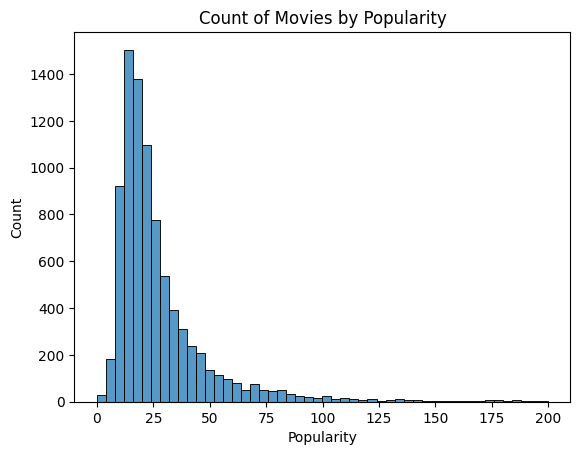

In [10]:
# Popularity Histogram

pop_filter = dat[(dat['popularity'] >= 0) & (dat['popularity'] <= 200)]
sns.histplot(pop_filter['popularity'], bins = 50)
plt.title("Count of Movies by Popularity")
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

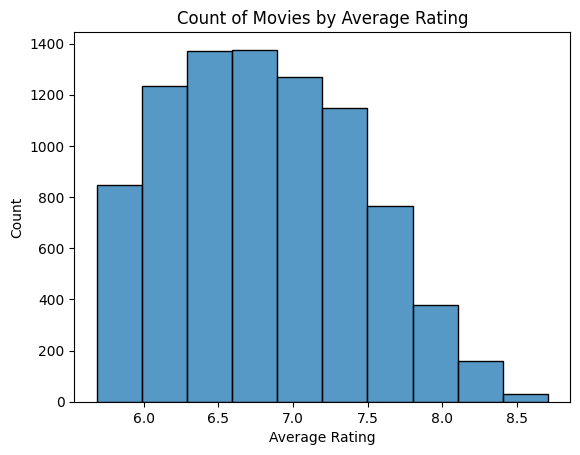

In [11]:
# movie count by average rating

sns.histplot(dat, x = 'vote_average', bins = 10)
plt.title('Count of Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

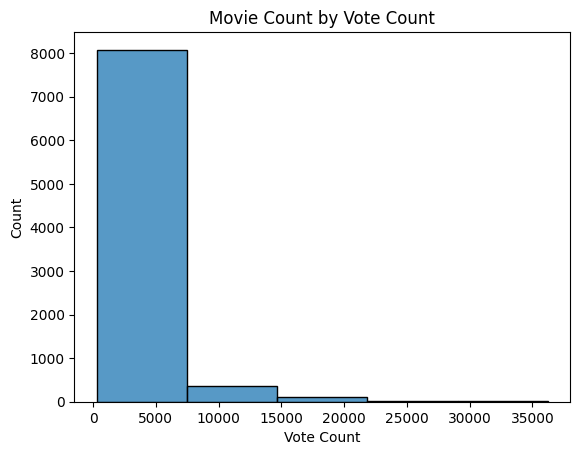

In [12]:
# Movie count by vote count

sns.histplot(dat, x = 'vote_count', bins = 5)
plt.title("Movie Count by Vote Count")
plt.xlabel('Vote Count')
plt.ylabel('Count')

plt.show()

Considering the statistical details about **vote_count** printed earlier using the <code>.describe()</code> function along with the histogram above, it becomes evident that the data is very much right skewed.

In [13]:
# check skewness metric
dat['vote_count'].skew()

3.830061623228037

In order to try and improve the readability of this plot, I am going to invoke the central limit theorem to reduce the size of the dataset. The reason for this is to help eliminate the extremely high valued outliers which severely compromise the quality of the visualization.

In [14]:
# set up new upper and lower bounds

mean_vc = np.mean(dat['vote_count'])
sd_vc = np.std(dat['vote_count'])

# setting lower bound to 0 because it is calculated to be negative due to skewedness
lowerbound_vc = 0

# upper bound
upperbound_vc = mean_vc + 2 * sd_vc

# updated data frame for plot
plotdata_vc = dat[(dat['vote_count'] >= lowerbound_vc) & (dat['vote_count'] <= upperbound_vc)]

plotdata_vc

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,960258,Shark Bait,A group of friends enjoying a weekend steal a ...,2022-05-13,34.679,5.697,318
1,1,11067,Major League II,"After losing in the ALCS the year before, the ...",1994-03-30,16.374,5.697,320
2,2,20856,Aliens in the Attic,A group of kids must protect their vacation ho...,2009-07-30,20.437,5.696,973
3,3,14098,100 Feet,After Marnie Watson kills her abusive husband ...,2008-07-22,18.927,5.696,304
4,4,11398,The Art of War,Neil Shaw is both agent and weapon - a critica...,2000-08-25,12.022,5.696,477
...,...,...,...,...,...,...,...,...
8575,8575,10723,Bulletproof,An undercover police officer named Rock Keats ...,1996-09-06,12.428,5.700,569
8576,8576,397422,Rough Night,Five best friends from college reunite 10 year...,2017-06-15,19.368,5.688,1963
8577,8577,70435,Haywire,A black ops soldier seeks payback after she is...,2011-11-01,17.259,5.700,1333
8578,8578,36599,Prom Night,"At a high school senior prom, a masked killer ...",1980-07-18,15.854,5.700,414


Creating an improved histogram

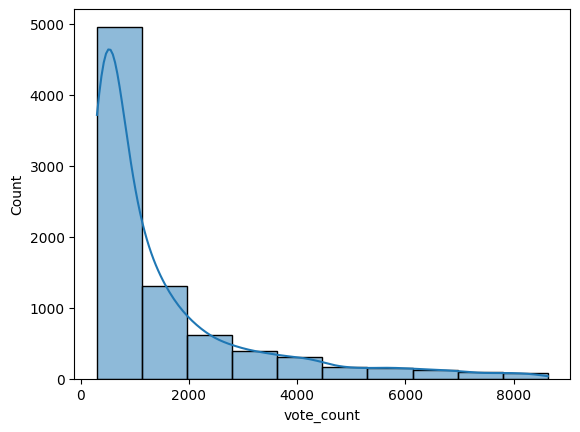

In [15]:
sns.histplot(plotdata_vc['vote_count'], bins =10, kde = True)
plt.show()

What are the movies that received so many votes?

In [29]:
# top 150 vote recievers 

dat_150vc = dat.sort_values(by = 'vote_count', ascending = False).head(150)
dat_150vc

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
68,68,27205,Inception,"Cobb, a skilled thief who commits corporate es...",2010-07-15,94.760,8.368,36238
41,41,157336,Interstellar,The adventures of a group of explorers who mak...,2014-11-05,177.797,8.440,35110
27,27,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,2008-07-16,166.733,8.516,32494
1062,1062,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009-12-15,99.465,7.583,31233
962,962,293660,Deadpool,The origin story of former Special Forces oper...,2016-02-09,185.118,7.621,30672
...,...,...,...,...,...,...,...,...
2199,2199,285,Pirates of the Caribbean: At World's End,Will Turner and Elizabeth Swann join forces wi...,2007-05-19,102.676,7.258,14117
2202,2202,285,Pirates of the Caribbean: At World's End,Will Turner and Elizabeth Swann join forces wi...,2007-05-19,102.676,7.258,14116
195,195,500,Reservoir Dogs,A botched robbery indicates a police informant...,1992-09-02,44.820,8.126,14103
503,503,152601,Her,"In the not so distant future, Theodore, a lone...",2013-12-18,62.629,7.857,14078


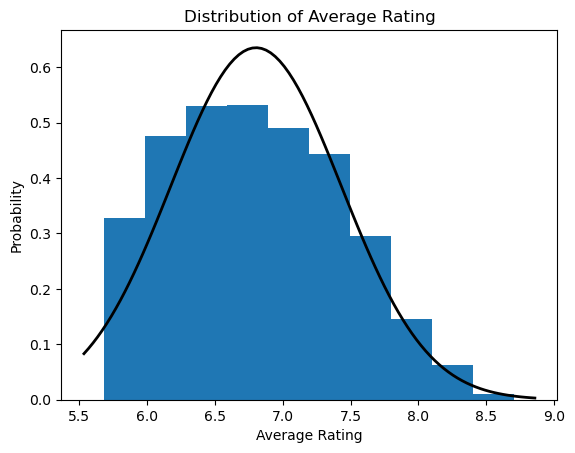

In [28]:
# ratings Histogram

mu, std = norm.fit(dat['vote_average'])

plt.hist(dat['vote_average'], bins = 10, density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.title('Distribution of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Probability')

plt.plot(x, p, 'k', linewidth = 2)



##### no bins! maybe something to mention in analysis

### Most popular _____

In [29]:
# 10 most popular movies


mp_movies = dat.sort_values(by = 'vote_average', ascending = False)

mp_movies.head(10)


,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
20,20,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,191.303,8.706,26757
21,21,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,152.632,8.690,20306
22,22,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,90.368,8.574,12244
23,23,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,92.258,8.565,15659
24,24,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,70.095,8.544,8490
25,25,129,Spirited Away,"A young girl, Chihiro, becomes trapped in a st...",2001-07-20,139.663,8.535,16288
26,26,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,53.491,8.531,4422
27,27,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,2008-07-16,166.733,8.516,32494
28,28,496243,Parasite,"All unemployed, Ki-taek's family takes peculia...",2019-05-30,103.416,8.507,17981
29,29,497,The Green Mile,A supernatural tale set on death row in a Sout...,1999-12-10,97.284,8.507,17182


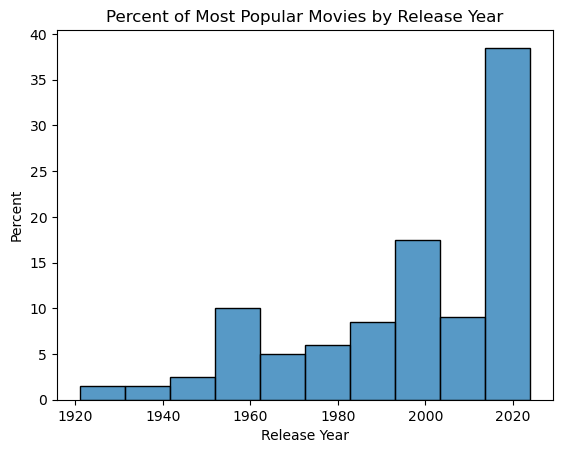

In [30]:
# bar graph of annual popularity

mp_movies['release_year'] = pd.to_datetime(mp_movies['release_date']).dt.year



sns.histplot(mp_movies['release_year'].head(200), bins = 10, stat = 'percent')
plt.title('Percent of Most Popular Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Percent')
plt.show()

In [31]:
# genres v popularity

sns.countplot(mp_movies['genre'].head(200))




KeyError: 'genre'

In [ ]:
for col in dat:
    sns.histplot(x=col, data = dat, kde=True)
    plt.show()